# Volume 4: Stochastic Differential Equations

# Name
# Class
# Date

In [3]:
"""Volume 4. Stochastic Differential Equations."""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from scipy import linalg as la
import pandas as pd

In [40]:
%matplotlib notebook

In [94]:
# Problem 1
def brownian_motion(g,y0,t):
    """
    Use the concepts of Brownian motion to
    generate animation of particle randomly moving
    
    Parameters:
        g (func): scalar function
        y0 (ndarray (2,)): inital condition
        t (int): time points
    """
    dt = (max(t) - min(t))/(len(t)-1)
    y = np.empty((len(t),2)) # initialize array of points with size t by 2
    y[0] = y0
    
    # Use discrete steps of brownian motion using the given equation
    step = 0
    while step < len(t)-1:
        y[step + 1] = y[step] + g(step, y[step]) * y[step] * np.random.randn(2) * dt
        step += 1
        
    return y

<IPython.core.display.Javascript object>


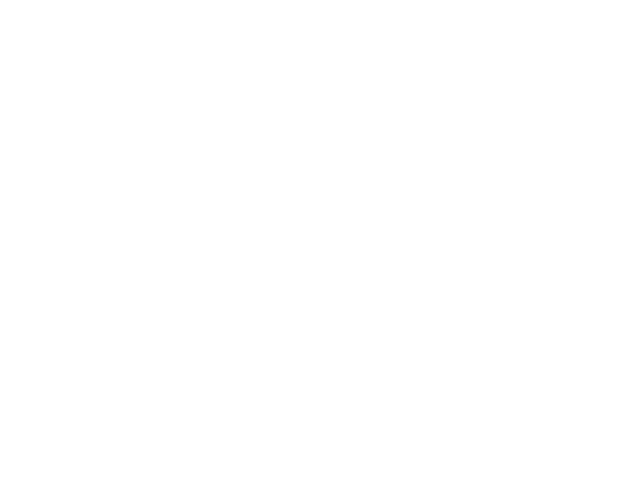

In [95]:
g = lambda t, x : x**0
y0 = np.ones(2)
t = np.arange(100)
y = brownian_motion(g,y0,t)

# Animate the bumblebee
fig, ax = plt.subplots()

point, = plt.plot([],[],'.')
tail, = plt.plot([],[],'--')

def init():
    ax.set_xlim(-max(y[:,0]), max(y[:,0]))
    ax.set_ylim(-max(y[:,1]), max(y[:,1]))
    return point, tail,

def update(i):
    
    point.set_data( y[i][0], y[i][1])
    tail.set_data( y[:i+1,0], y[:i+1,1])
    return point, tail,

ani = animation.FuncAnimation(fig, update, frames=range(len(y)), init_func = init, blit=True)
ani.save("prob1.mp4")


<video src="prob1.mp4" controls=True>

In [79]:
# Problem 2
def euler_maruyama(f,g,y0,t):
    """
    Use the Euler-Maruyama method to predict
    the future n observations of the SDE
        dS = S\mu(t)dt + S\sigma(t)dW

    Parameters:
        f (function): 
        g (function): 
        y0 (ndnarray (mx1) or float or int): initial data point

    Returns:
       sol (ndarray (m,n)): future observations
    """
    dt = (t[-1] - t[0])/(len(t) - 1)
    y = np.empty((len(t),2)) # initialize array of points with size t by 2
    y[0] = y0
    
    # Use discrete steps of brownian motion using the given equation
    step = 0
    while step < len(y)-1:
        y[step + 1] = y[step] * (1 + f(step, y[step]) * dt + g(step, y[step]) * np.random.randn(1) * dt)
        step += 1
        
    return y

<IPython.core.display.Javascript object>


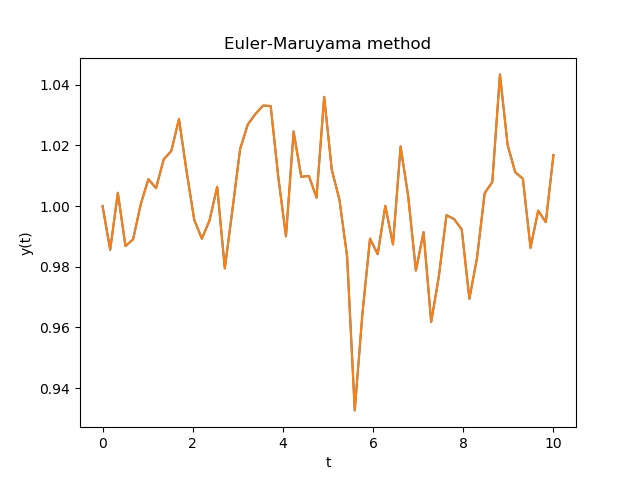

In [83]:
g = lambda t, x : 0.1
f = lambda t, x : 1 - x**2
y0 = np.ones(1)
t = np.linspace(0,10,60)
y = euler_maruyama(f,g,y0,t)

plt.plot(t,y)
plt.title("Euler-Maruyama method")
plt.ylabel("y(t)")
plt.xlabel("t")
plt.show()

In [41]:
# Problem 3
def theta(data):
    """
    Calculate MAP of mu and sigma.

    Parameters:
        data (str): filename of historical data
    
    Returns:
        mu (ndarray): mean of data
        sigma (ndarray): standard deviation of data
    """
    df = pd.read_csv(data)
    dSS = (df.close[1:] - df.close[:-1])
    print(dSS)
    N = len(dSS)
    
    f = lambda theta : N * np.log(np.sqrt(2 * np.pi * theta[1]**2)) + 1/(2 * theta[1]**2) * sum((dSS-theta[0])**2)
    done = minimize(f,(dSS.mean(), dSS.var()), method='Nelder-Mead')
    mu, sig = done.x
    return mu, sig

In [42]:
theta('google_stock.csv')

0      NaN
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
346    0.0
347    0.0
348    0.0
349    0.0
350    0.0
351    0.0
352    0.0
353    0.0
354    0.0
355    0.0
356    0.0
357    0.0
358    0.0
359    0.0
360    0.0
361    0.0
362    0.0
363    0.0
364    0.0
365    0.0
366    0.0
367    0.0
368    0.0
369    0.0
370    0.0
371    0.0
372    0.0
373    0.0
374    0.0
375    NaN
Name: close, Length: 376, dtype: float64


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


(0.0, 0.0)

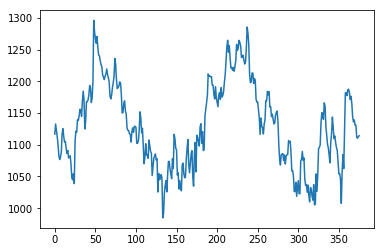

In [29]:
# Problem 4
def prob4(iters=1000):
    """
    Use the Euler-Maruyama method on historical Google stock data.
    Run the method 1000 times and plot the average predict stock value
    for the next n values

    Parameters:
        n (int): number of predicted values
        iterations (int): number of iterations
    """
    df = pd.read_csv('google_stock.csv')
    close = df.close
    
    mu, sig = theta('google_stock.csv')
    
    f = lambda t,x: mu
    g = lambda t,x: sig
    
    t_predict = np.arange(377,428)
    prediction = euler_maruyama()
    
    
    t_data = np.arange(len(df))
    plt.plot(t_data, close)
    
    
    plt.show()
prob4()

In [ ]:
def convergence(iters = 1000):
    """
    Show convergence of EM
    
    Parameters:
        iters (int): number of times to calculate difference
    """
    pass